# **Human Activity Recognition Using Smartphones**

Ervin Pangilinan, Lauren Bailey, Gomathi Lakshmanan

## **Pre-Processing Phase - Exploratory Data Analysis and Dimensionality Reduction**

In [ ]:
# Import required libraries

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
# Load from the .txt files
features_file = "X_train.txt"
labels_file = "y_train.txt"
features_test_file = "X_test.txt"
labels_test_file = "y_test.txt"

x_train = np.loadtxt(features_file)
y_train = np.loadtxt(labels_file)
X_test = np.loadtxt(features_test_file)
y_test = np.loadtxt(labels_test_file)

print(f"Size of x_train: {x_train.shape}")
print(f"Size of y_train: {y_train.shape}")
print(f"Size of X_test: {X_test.shape}")
print(f"Size of y_test: {y_test.shape}")

Size of x_train: (7352, 561)
Size of y_train: (7352,)
Size of X_test: (2947, 561)
Size of y_test: (2947,)


In [ ]:
# Convert NumPy arrays to Pandas DataFrames
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train, columns=["Label"])
x_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test, columns=["Label"])

In [ ]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [ ]:
y_train.head()

,Label
0,5.0
1,5.0
2,5.0
3,5.0
4,5.0


In [ ]:
# Print the labels in y_train
print("Labels:", y_train["Label"].unique())

Labels: [5. 4. 6. 1. 3. 2.]


* Label 1 - WALKING
* Label 2 - WALKING_UPSTAIRS
* Label 3 - WALKING_DOWNSTAIRS
* Label 4 - SITTING
* Label 5 - STANDING
* Label 6 - LAYING

In [ ]:
# Distribution of classes
class_distribution = y_train.value_counts()
class_distribution

,count
Label,
6.0,1407
5.0,1374
4.0,1286
1.0,1226
2.0,1073
3.0,986


* The dataset is imbalanced.

In [ ]:
# Scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

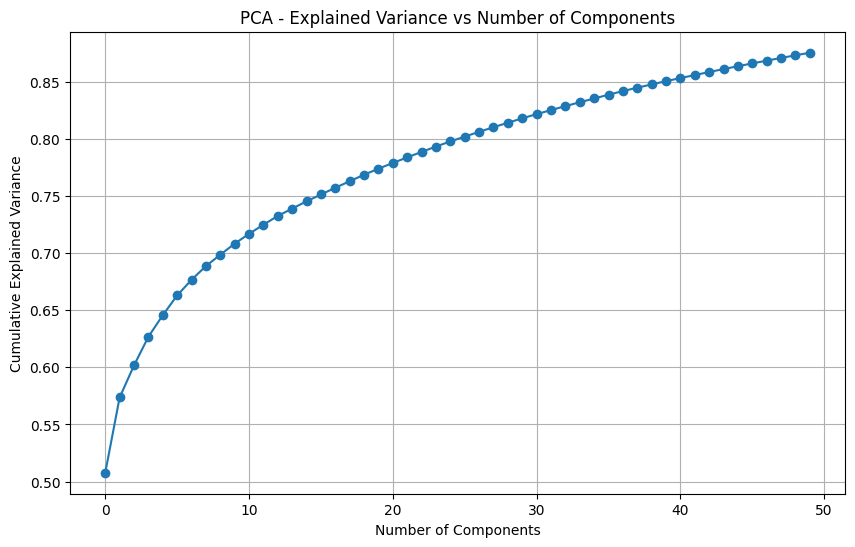

In [ ]:
# Apply PCA
pca = PCA(n_components=50)  # Reduce to 50 components
x_train_pca = pca.fit_transform(x_train)

# Plot the explained variance ratio for PCA components
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance vs Number of Components')
plt.grid()
plt.show()


*   Elbow point: Around 10-15 components, where the curve starts to level off.

*   Beyond 15 components, the explained variance increases more slowly.

We reduce the dimensionality using PCA to 15 components, which contribute the most significant variance, and then apply t-SNE for further analysis.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


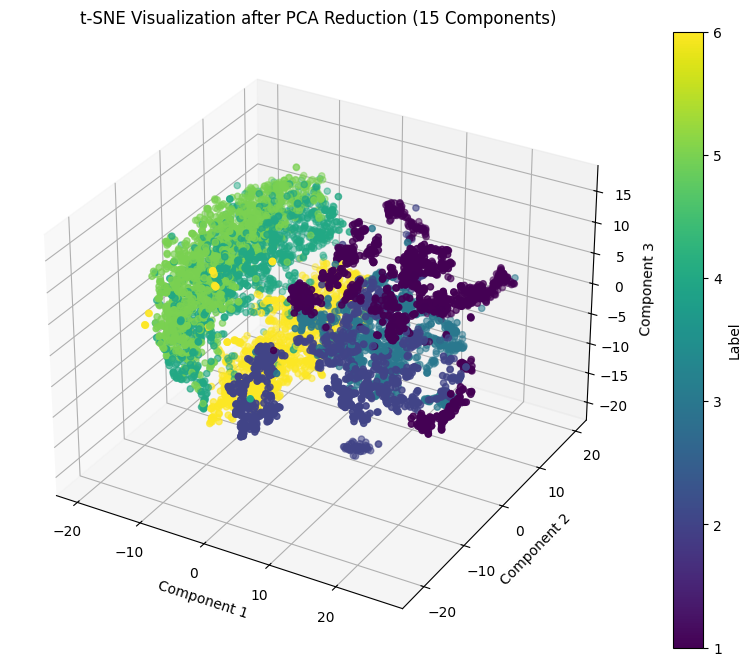

In [ ]:
# Apply PCA with 15 components
pca = PCA(n_components=15)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Apply t-SNE on the reduced PCA data
tsne = TSNE(n_components=3, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
x_train_tsne = tsne.fit_transform(x_train_pca)

# Plot the t-SNE Results
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], x_train_tsne[:, 2], c=y_train["Label"], cmap='viridis', s=20)
ax.set_title('t-SNE Visualization after PCA Reduction (15 Components)')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.colorbar(scatter, ax=ax, label="Label")
plt.show()

* Clusters have **significant overlap**, indicating that the activities have similar characteristics, making them harder to separate.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


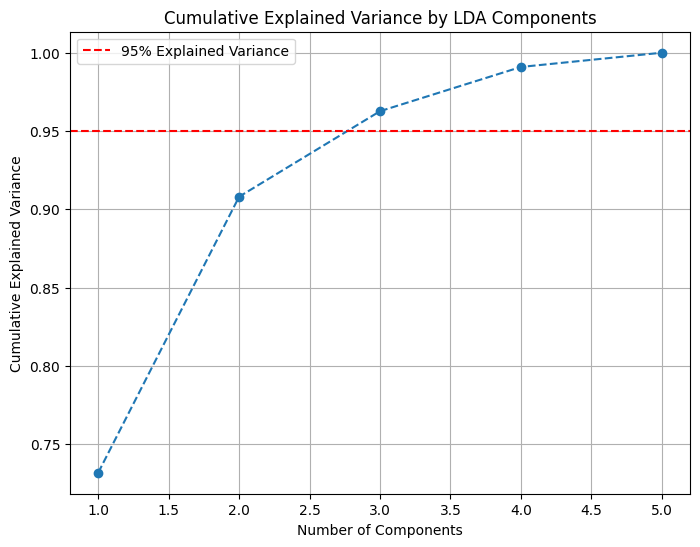

In [ ]:
# Apply FLD

fld = LinearDiscriminantAnalysis(n_components=5) # Reduce to 5 components
fld.fit(x_train,y_train)
x_train_fld = fld.transform(x_train)
x_test_fld=fld.transform(x_test)

# Plot explained variance ratios
explained_variance = fld.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by LDA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


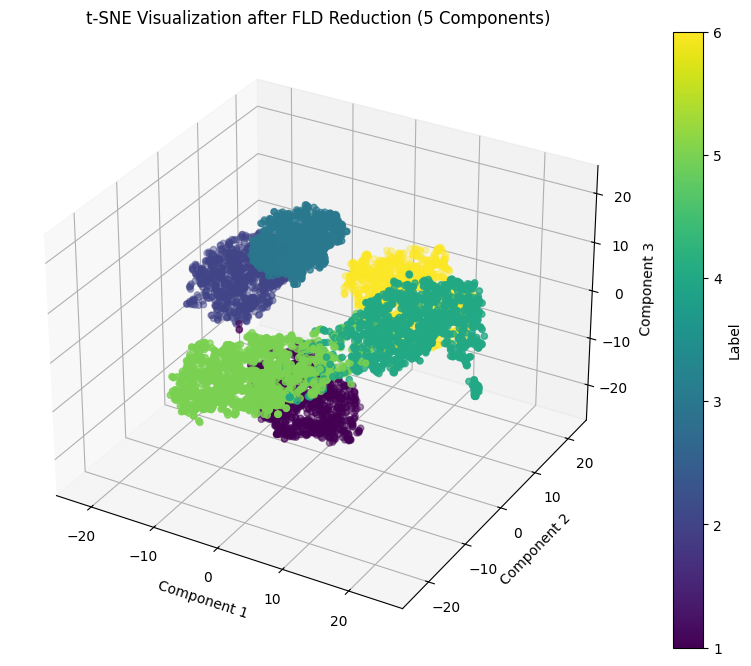

In [ ]:
# Apply tSNE on reduced FLD data

tsne = TSNE(n_components=3, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
x_train_tsne = tsne.fit_transform(x_train_fld)

# Plot the t-SNE Results
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], x_train_tsne[:, 2], c=y_train["Label"], cmap='viridis', s=20)
ax.set_title('t-SNE Visualization after FLD Reduction (5 Components)')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.colorbar(scatter, ax=ax, label="Label")
plt.show()

Cluster have much less overlap then seen in the PCA reduction

## **Processing Phase - Hyperparameter Tuning and Classification**

In [ ]:
# Import required libraries

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

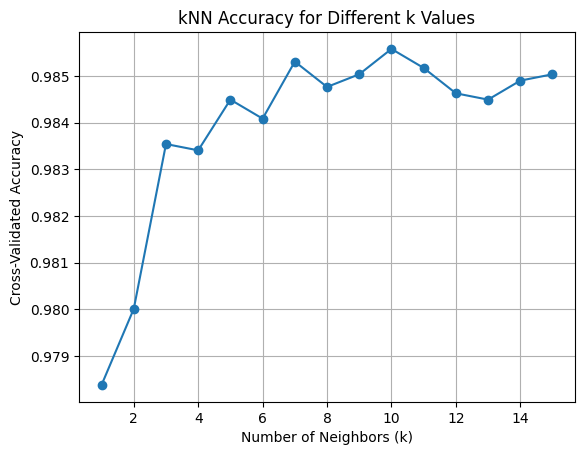

In [ ]:
# Implement kNN

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

k_values = range(1, 16)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train_fld, y_train, cv=10)
    mean_score = np.mean(scores)
    accuracies.append(mean_score)

# Plotting accuracy vs. k value
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('kNN Accuracy for Different k Values')
plt.grid(True)
plt.show()

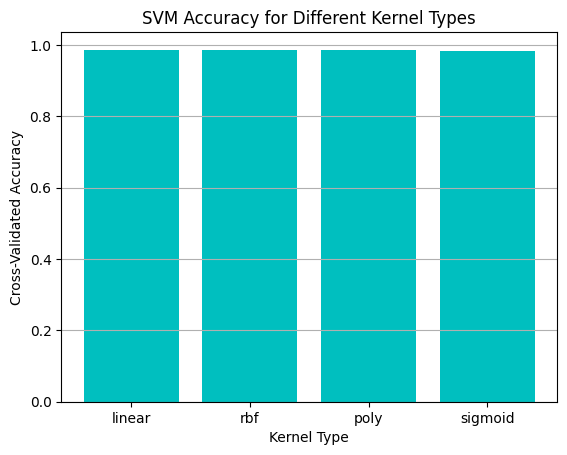

In [ ]:
# Implement SVM

# Different kernel types to test
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
accuracies_svm = {}

for kernel in kernels:
    svm = SVC(kernel=kernel)
    scores = cross_val_score(svm, x_train_fld, y_train, cv=10)
    mean_score = np.mean(scores)
    accuracies_svm[kernel] = mean_score

plt.bar(accuracies_svm.keys(), accuracies_svm.values(), color='c')
plt.xlabel('Kernel Type')
plt.ylabel('Cross-Validated Accuracy')
plt.title('SVM Accuracy for Different Kernel Types')
plt.grid(axis='y')
plt.show()

In [ ]:
# Implementing Neural Network
mlp = MLPClassifier(max_iter=1000)

# Grid Search for finding hyperparameters for MLP
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
}

# Apply 10-fold cross-validation for Grid Search
mlp_grid = GridSearchCV(mlp, param_grid, cv=10, scoring='accuracy')
mlp_grid.fit(x_train_fld, y_train)

# Output best hyperparameters with results
print("Best Hyperparameters: ", mlp_grid.best_params_)
print("Best Accuracy Score during Grid Search: ", mlp_grid.best_score_)
best_model = mlp_grid.best_estimator_

# Use the best model on the test set
y_pred_mlp = best_model.predict(x_test_fld)

Best Hyperparameters:  {'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'solver': 'sgd'}
Best Accuracy Score during Grid Search:  0.9869441363501922


## **Post-Processing Phase - Performance Evaluation and Classifier Fusion**

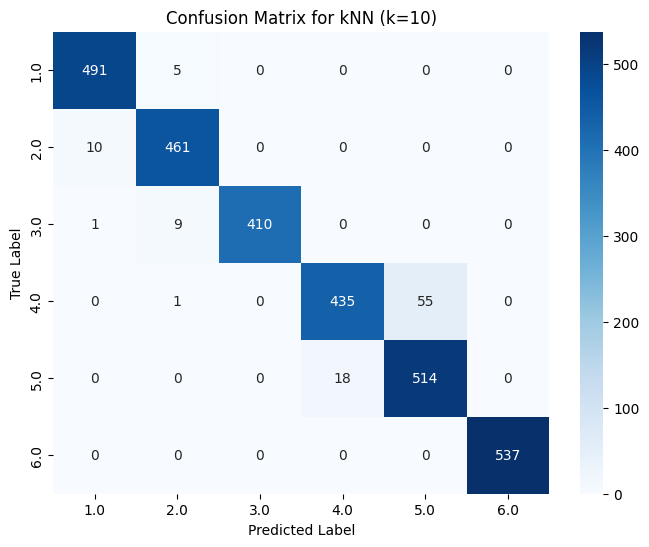

Classification Report for kNN (k=10):

              precision    recall  f1-score   support

         1.0       0.98      0.99      0.98       496
         2.0       0.97      0.98      0.97       471
         3.0       1.00      0.98      0.99       420
         4.0       0.96      0.89      0.92       491
         5.0       0.90      0.97      0.93       532
         6.0       1.00      1.00      1.00       537

    accuracy                           0.97      2947
   macro avg       0.97      0.97      0.97      2947
weighted avg       0.97      0.97      0.97      2947



In [ ]:
# kNN Post-Processing
best_k = 10
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(x_train_fld, y_train)

y_pred_knn = knn_best.predict(x_test_fld)

# Generate Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for kNN (k={best_k})')
plt.show()

# Generate Classification Report
class_report = classification_report(y_test, y_pred_knn)
print(f"Classification Report for kNN (k={best_k}):\n")
print(class_report)

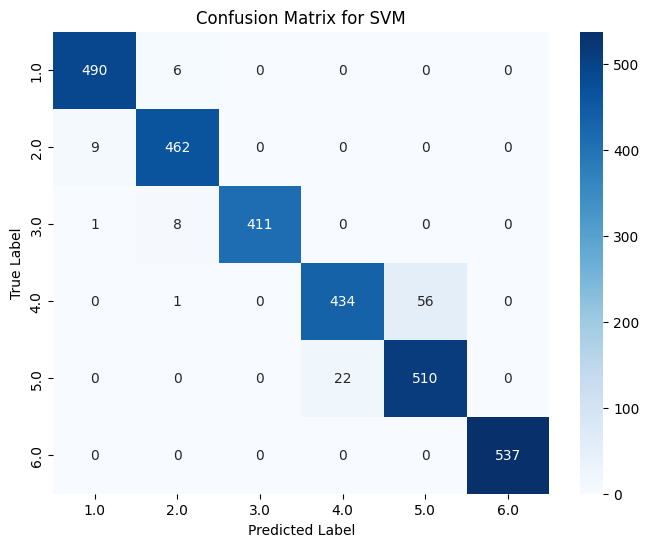

Classification Report (RBF Kernel):
               precision    recall  f1-score   support

         1.0       0.98      0.99      0.98       496
         2.0       0.97      0.98      0.97       471
         3.0       1.00      0.98      0.99       420
         4.0       0.95      0.88      0.92       491
         5.0       0.90      0.96      0.93       532
         6.0       1.00      1.00      1.00       537

    accuracy                           0.97      2947
   macro avg       0.97      0.96      0.97      2947
weighted avg       0.97      0.97      0.96      2947



In [ ]:
# RBF Kernel Post-Processing
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(x_train_fld, y_train)
y_pred_svm = svm_rbf.predict(x_test_fld)

# Generate Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for SVM')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred_svm)
print("Classification Report (RBF Kernel):\n", class_report)

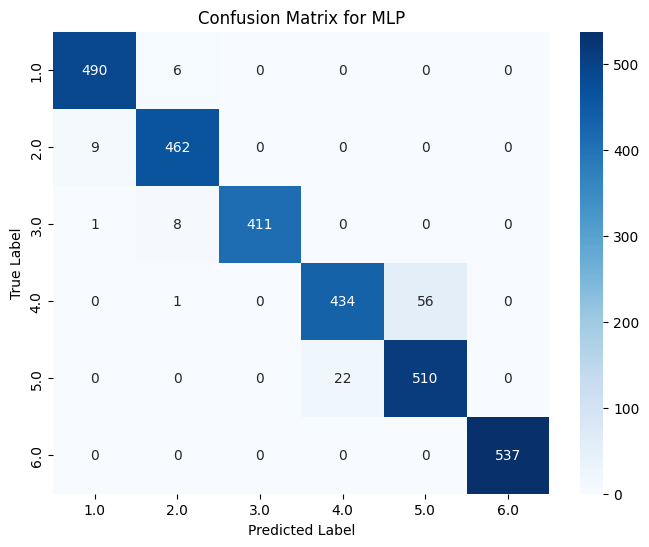

Classification Report (MLP):
               precision    recall  f1-score   support

         1.0       0.98      0.99      0.98       496
         2.0       0.97      0.98      0.98       471
         3.0       1.00      0.98      0.99       420
         4.0       0.96      0.88      0.92       491
         5.0       0.90      0.96      0.93       532
         6.0       1.00      1.00      1.00       537

    accuracy                           0.97      2947
   macro avg       0.97      0.97      0.97      2947
weighted avg       0.97      0.97      0.97      2947



In [ ]:
# Neural Network Post-Processing

# Generate Confusion Matrix
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for MLP')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred_mlp)
print("Classification Report (MLP):\n", class_report)

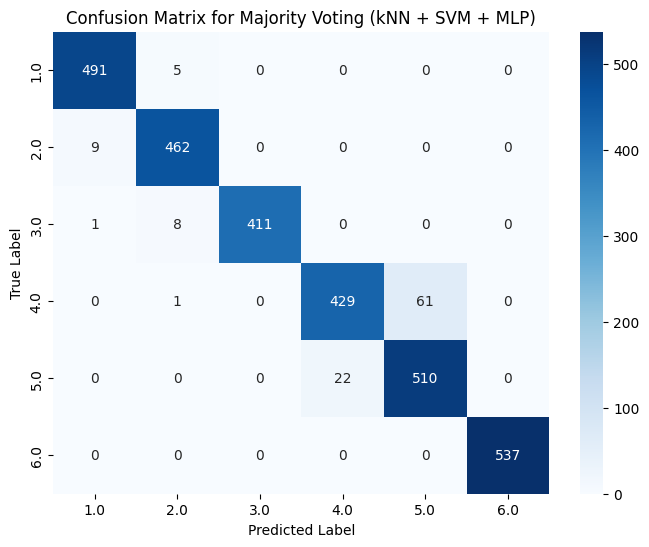

Classification Report for Majority Voting (kNN + SVM + MLP):

              precision    recall  f1-score   support

         1.0       0.98      0.99      0.98       496
         2.0       0.97      0.98      0.98       471
         3.0       1.00      0.98      0.99       420
         4.0       0.95      0.87      0.91       491
         5.0       0.89      0.96      0.92       532
         6.0       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.97      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [ ]:
# Majority Voting Fusion
from sklearn.ensemble import VotingClassifier

# Create Voting Classifier with Majority Voting
voting_clf = VotingClassifier(estimators=[('knn', knn_best), ('svm', svm_rbf), ('mlp', best_model)], voting='hard')
voting_clf.fit(x_train_fld, y_train)

# Predict using Majority Voting
y_majority_pred = voting_clf.predict(x_test_fld)

# Generate Confusion Matrix for Majority Voting
conf_matrix_majority = confusion_matrix(y_test, y_majority_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_majority, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Majority Voting (kNN + SVM + MLP)')
plt.show()

# Generate Classification Report for Majority Voting
class_report_majority = classification_report(y_test, y_majority_pred)
print("Classification Report for Majority Voting (kNN + SVM + MLP):\n")
print(class_report_majority)

Classification Report for Stacking (kNN + SVM + MLP):

              precision    recall  f1-score   support

         1.0       0.98      0.99      0.98       496
         2.0       0.97      0.98      0.97       471
         3.0       1.00      0.98      0.99       420
         4.0       0.96      0.89      0.92       491
         5.0       0.90      0.96      0.93       532
         6.0       1.00      1.00      1.00       537

    accuracy                           0.97      2947
   macro avg       0.97      0.97      0.97      2947
weighted avg       0.97      0.97      0.97      2947



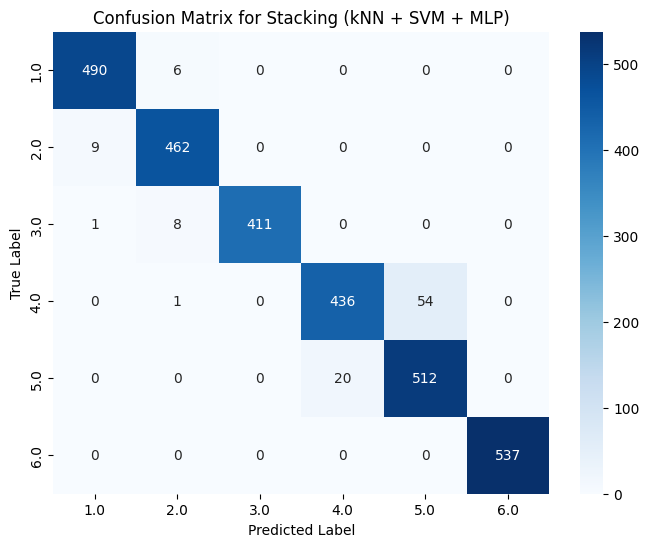

In [ ]:
# Implement Stacking Classifier
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(estimators=[('knn', knn_best), ('svm', svm_rbf), ('mlp', best_model)])
stacking_clf.fit(x_train_fld, y_train)

# Predict using Stacking
y_stacking_pred = stacking_clf.predict(x_test_fld)

# Generate Confusion Matrix from Stacking
conf_matrix_stacking = confusion_matrix(y_test, y_stacking_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_stacking, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Stacking (kNN + SVM + MLP)')
plt.show()

# Generate Classification Report
class_report_stacking = classification_report(y_test, y_stacking_pred)
print("Classification Report for Stacking (kNN + SVM + MLP):\n")
print(class_report_stacking)